In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [2]:
train = pd.read_csv(r"/kaggle/input/emnist/emnist-balanced-train.csv", header= None)
test = pd.read_csv(r"/kaggle/input/emnist/emnist-balanced-test.csv", header= None)
print(train.shape)
print(test.shape)

(112800, 785)
(18800, 785)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import cv2

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras as kr

In [4]:
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras import utils
from sklearn.preprocessing import OneHotEncoder 

In [44]:
print("numpy:",np.__version__)
print("pandas:",pd.__version__)
print("tensorflow:",tf.__version__)

numpy: 1.26.4
pandas: 2.2.3
tensorflow: 2.16.1


In [6]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
label_map = pd.read_csv("/kaggle/input/emnist/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        )
label_m = label_map.squeeze()

In [8]:
label_dict2={}
for i,labels in enumerate(label_m):
    label_dict2[labels] = chr(labels)
label_dict2

{48: '0',
 49: '1',
 50: '2',
 51: '3',
 52: '4',
 53: '5',
 54: '6',
 55: '7',
 56: '8',
 57: '9',
 65: 'A',
 66: 'B',
 67: 'C',
 68: 'D',
 69: 'E',
 70: 'F',
 71: 'G',
 72: 'H',
 73: 'I',
 74: 'J',
 75: 'K',
 76: 'L',
 77: 'M',
 78: 'N',
 79: 'O',
 80: 'P',
 81: 'Q',
 82: 'R',
 83: 'S',
 84: 'T',
 85: 'U',
 86: 'V',
 87: 'W',
 88: 'X',
 89: 'Y',
 90: 'Z',
 97: 'a',
 98: 'b',
 100: 'd',
 101: 'e',
 102: 'f',
 103: 'g',
 104: 'h',
 110: 'n',
 113: 'q',
 114: 'r',
 116: 't'}

In [9]:
label_dict={}
for i,labels in enumerate(label_m):
    label_dict[i] = chr(labels)
label_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [10]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]

x_train.shape, y_train.shape

((112800, 784), (112800,))

In [11]:
x_test = test.iloc[:, 1:] 
y_test = test.iloc[:, 0]
x_test.shape, y_test.shape

((18800, 784), (18800,))

In [12]:
sam_img=x_train.iloc[200]#this returns a series from the dataframe. Hence the shape is '(784,)'
sam_lab=y_train.iloc[200]

In [13]:
## A code to reshape a vector to matrix using numpy  

#"import numpy as np"
#(the lines in '' are the code lines).
# A flattened 1D array of length 784 (representing a 28x28 image).
#'flattened_image = np.arange(1, 785)  # Example array with values 1 to 784'

# Reshape it to 28x28.
#'reshaped_image = flattened_image.reshape(28, 28)'

#'print(reshaped_image)'

# ## A code to reshape a vector to matrix using numpy 

import numpy as np


**( A flattened 1D array of length 784 (representing a 28x28 image).)**

flattened_image = np.arange(1, 785)  

**(Example array with values 1 to 784)**


**(Reshape it to 28x28.)**
reshaped_image = flattened_image.reshape(28, 28)


print(reshaped_image)

Label entry No. 200: e


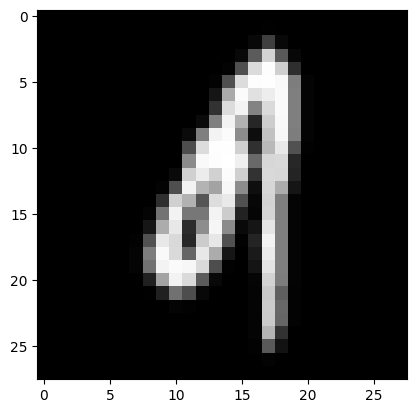

In [14]:
W=28
H=28
print("Label entry No. 200:", label_dict[sam_lab])
plt.imshow(sam_img.values.reshape(W,H), cmap="gray")
plt.show()

The images need to be preprocessed to be visualised properly. Hence we define a function to flip, rotate, and transform the images to grayscale.

In [15]:
def preproc_1(image):
    W = 28
    H = 28
    image = image.to_numpy(copy=True).reshape(W, H)#numpy methods work well with pandas dataframes and series(for this case).
    image = np.fliplr(image)
    image = np.rot90(image)
    plt.imshow(image,cmap="gray")
    plt.show()
    return image

Label entry No. 200: e


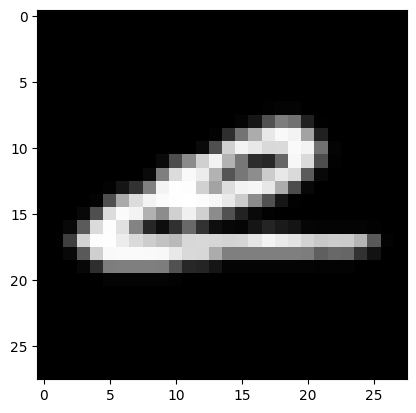

In [16]:
print("Label entry No. 200:", label_dict[sam_lab])
img=preproc_1(sam_img)

In [17]:
def preproc_all(image):
    W = 28
    H = 28
    image = image.reshape(W, H)#numpy methods work well with pandas dataframes and series(for this case).
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [18]:
x_train = np.apply_along_axis(preproc_all, 1, x_train)
x_train.shape

(112800, 28, 28)

In [19]:
x_test = np.apply_along_axis(preproc_all, 1, x_test)
x_test.shape

(18800, 28, 28)

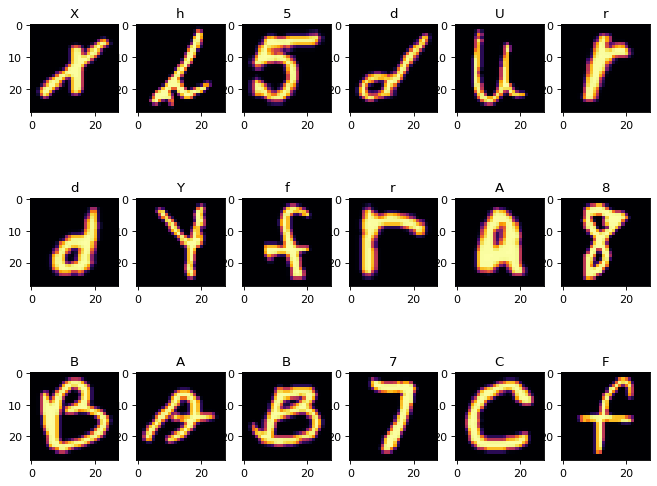

In [20]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(x_train[i], cmap="inferno")
    plt.title(label_dict[y_train[i]])

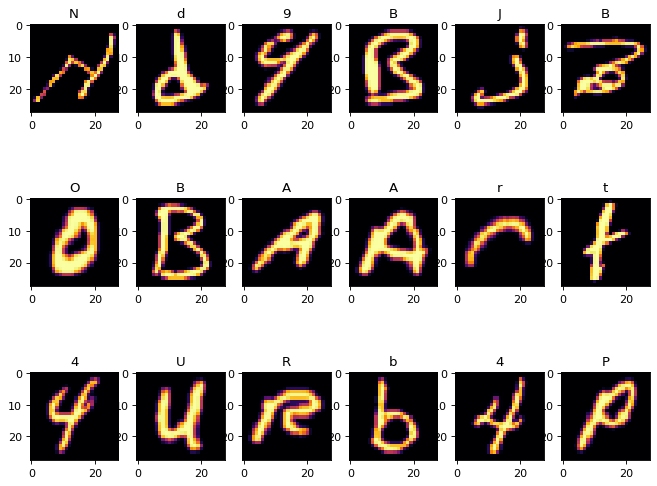

In [21]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(x_test[i], cmap="inferno")
    plt.title(label_dict[y_test[i]])

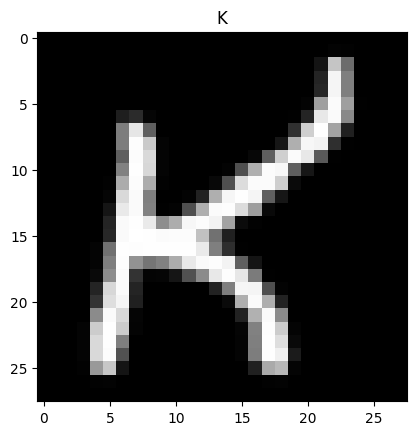

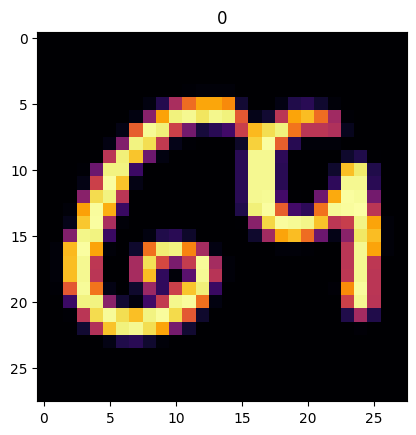

In [22]:
x_train= x_train.astype(float)/255
x_test= x_test.astype(float)/255
plt.imshow(x_train[120],cmap="gray")
plt.title(label_dict[y_train[120]])
plt.show()
plt.imshow(x_test[120],cmap="inferno")
plt.title(label_dict[y_test[120]])
plt.show()

# **ONE-HOT ENCODING** 

For the ease of classification we will be one-hot encoding it to make it categorical in a binary format.
example-[1][0][0]....[0]x33 to represent 0.

In [23]:
classes=  y_train.nunique()
classes

47

In [24]:
y_train.shape

(112800,)

In [25]:
encoder = OneHotEncoder(sparse_output=False)
y_train= y_train.values.reshape(-1,1)
y_train = encoder.fit_transform(y_train)

In [26]:
y_train.shape

(112800, 47)

In [27]:
encoder = OneHotEncoder(sparse_output=False)
y_test= y_test.values.reshape(-1,1)
y_test = encoder.fit_transform(y_test)

In [28]:
y_train[120]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
y_test[120]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
print(x_train.shape)
x_train=x_train.reshape(-1,W,H,1)
print(x_train.shape)

(112800, 28, 28)
(112800, 28, 28, 1)


In [31]:
print(x_test.shape)
x_test=x_test.reshape(-1,W,H,1)
print(x_test.shape)

(18800, 28, 28)
(18800, 28, 28, 1)


In [32]:
model= Sequential([
kr.layers.Flatten(input_shape =(28,28),),
Dense(140, input_shape=(784,), activation='relu'),
Dense(140, activation='relu'),
Dense(classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)
hist=model.fit(x_train, y_train,validation_split=0.1,callbacks=early_stopping, epochs=50)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


I0000 00:00:1734363511.936198      90 service.cc:145] XLA service 0x7b41600054a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734363511.936249      90 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 109/3173 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1676 - loss: 3.3722

I0000 00:00:1734363513.035736      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3173/3173 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6089 - loss: 1.4022 - val_accuracy: 0.7746 - val_loss: 0.6959
Epoch 2/50
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8006 - loss: 0.6105 - val_accuracy: 0.7974 - val_loss: 0.6048
Epoch 3/50
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8273 - loss: 0.5103 - val_accuracy: 0.8114 - val_loss: 0.5590
Epoch 4/50
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8456 - loss: 0.4527 - val_accuracy: 0.8164 - val_loss: 0.5535
Epoch 5/50
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8547 - loss: 0.4213 - val_accuracy: 0.8176 - val_loss: 0.5328
Epoch 6/50
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8611 - loss: 0.3903 - val_accuracy: 0.8215 - val_loss: 0.5487
Epoch 7/50
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8667 - loss: 0.3658 - val_accuracy: 0.8237 - val_loss: 0.5393
Epoch 8/50
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8720 - loss: 0.3472 - val_accurac

In [33]:
y_pred = model.predict(x_test)
# Finding shape
y_pred.shape

588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(18800, 47)

In [34]:
# Evaluate on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 82.60%


In [35]:
y_test[200]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

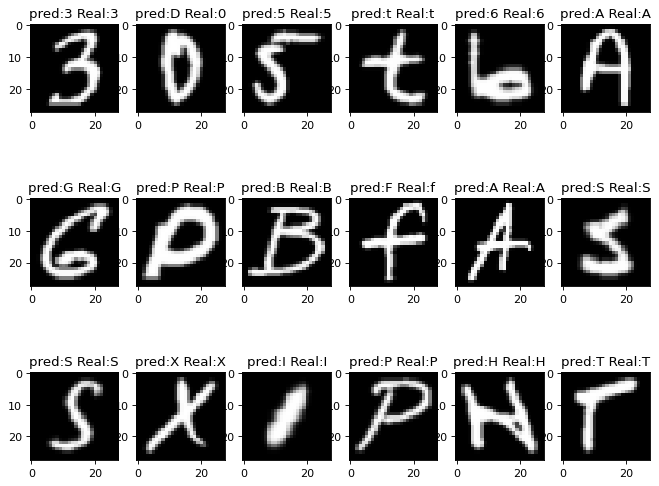

In [36]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(200, 218):
    plt.subplot(3,6,i-199)
    plt.imshow(x_test[i], cmap=plt.cm.gray)
    plt.title(f"pred:{label_dict[y_pred[i].argmax()]} Real:{label_dict[y_test[i].argmax()]}" )

In [37]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(acc)+1)

In [38]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

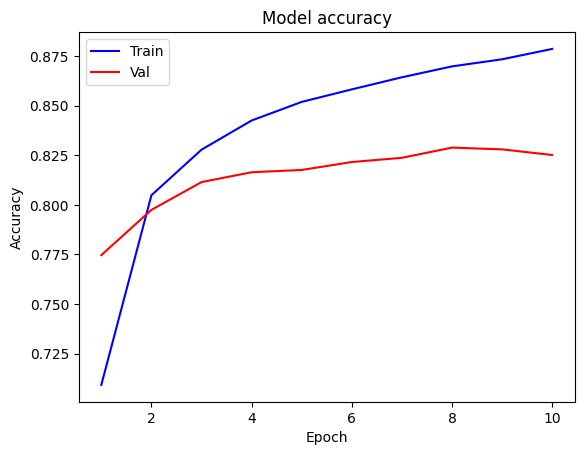

In [39]:
plotgraph(epochs, acc, val_acc)

In [40]:
def plotgraph_loss(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, loss, 'g')
    plt.plot(epochs, val_loss, 'r')
    plt.title('Loss Variation')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

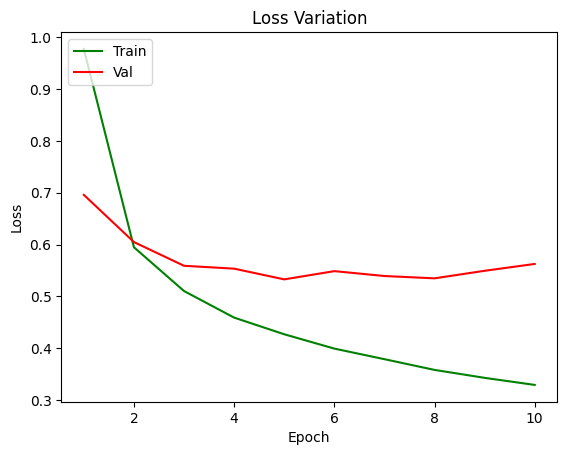

In [41]:
plotgraph_loss(epochs, loss, val_loss)

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save('model1.keras')
model = load_model('model1.keras')